<a href="https://colab.research.google.com/github/anushka-code/Coding-Blocks-ML-DL-/blob/main/Perceptron_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [90]:
X,Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=3) # m = 500, n = 2, number of classes = 2
print(X.shape, Y.shape)

(500, 2) (500,)


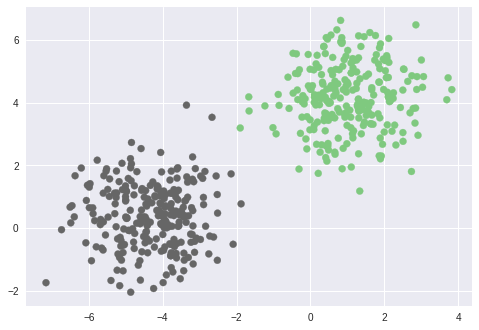

In [91]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

Steps : PART I


1.   Forward Pass - Pass the inputs and the weights to get an expected output Y_hat using activation function 
2.   Loss - Find the loss from expected output and predicted output using Binary Cross Entropy
3.   Minimize Loss - Minimize loss using Gradient Descent to tweak the weights and biases during backpropagation




In [92]:
#activation function
def sigmoid(z): #we can use this even for arrays and hence entire matrix
  return (1.0)/(1+np.exp(-z))

In [93]:
#prediction function
def predict (X, weights):
  z = np.dot(X,weights)
  predictions = sigmoid(z)
  return predictions

In [94]:
#binary cross entropy - loss function
def loss (X,Y,weights):
  Y_hat = predict(X,weights)
  cost = np.mean(-Y*np.log(Y_hat) - (1-Y)*np.log(1-Y_hat))
  return cost

In [95]:
#gradient descent 
def update(X,Y,weights,l_rate):
  Y_hat = predict(X,weights)
  dJ = np.dot(X.T, Y_hat-Y)

  m = X.shape[0]
  weights = weights - l_rate*dJ/(float(m))
  return weights

In [96]:
#training the perceptron
def train(X,Y,l_rate=0.5,maxEpoches=100):

  #modify the input to handle bias term
  ones = np.ones((X.shape[0],1)) #column vector of shape n
  X = np.hstack((ones,X)) #n+1

  #initialise weights
  weights = np.zeros(X.shape[1]) #column vector of shape m
 
  for epoch in range(maxEpoches):

    weights = update(X,Y,weights,l_rate)

    if epoch%20==0:
      l = loss(X,Y,weights)
      print("Epoch : %d, Loss %.4f" %(epoch,l))

  return weights

In [97]:
weights = train(X,Y,l_rate=0.8,maxEpoches=550)
print(weights) # we get 3 weights which are trained, one is bias (w0) and other are two features

Epoch : 0, Loss 0.0314
Epoch : 20, Loss 0.0131
Epoch : 40, Loss 0.0095
Epoch : 60, Loss 0.0078
Epoch : 80, Loss 0.0068
Epoch : 100, Loss 0.0061
Epoch : 120, Loss 0.0056
Epoch : 140, Loss 0.0052
Epoch : 160, Loss 0.0049
Epoch : 180, Loss 0.0046
Epoch : 200, Loss 0.0044
Epoch : 220, Loss 0.0042
Epoch : 240, Loss 0.0040
Epoch : 260, Loss 0.0039
Epoch : 280, Loss 0.0038
Epoch : 300, Loss 0.0037
Epoch : 320, Loss 0.0036
Epoch : 340, Loss 0.0035
Epoch : 360, Loss 0.0034
Epoch : 380, Loss 0.0033
Epoch : 400, Loss 0.0032
Epoch : 420, Loss 0.0032
Epoch : 440, Loss 0.0031
Epoch : 460, Loss 0.0030
Epoch : 480, Loss 0.0030
Epoch : 500, Loss 0.0029
Epoch : 520, Loss 0.0029
Epoch : 540, Loss 0.0028
[-0.14994109 -2.89473905 -1.90841713]


Steps : PART II



1.   Make Predictions
2.   Visualise Decision Surface
3.   Linear vs Non Linear Classification



In [98]:
print(np.ones([5,1]))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [99]:
def getPredictions(X_test, weights, labels=True):
  if X_test.shape[1] != weights.shape[0]:
    ones = np.ones((X_test.shape[0],1))
    X_test = np.hstack((ones,X_test))

    probs = predict(X_test,weights)
    

    if not labels:
      return probs
    else:
      labels = np.zeros(probs.shape)
      labels[probs>=0.5] = 1
      return labels

In [100]:
weights

array([-0.14994109, -2.89473905, -1.90841713])

In [101]:
x1 = np.linspace(-6,4,10)
x2 = -(weights[0] + weights[1]*x1) / weights[2]

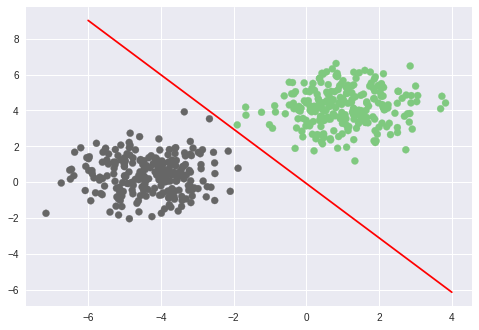

In [102]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c="red")
plt.show()

In [103]:
#Find the Accuracy
Y_predicted = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y==Y_predicted)/Y.shape[0] #sum of the true and false divided by total number of training examples
print(training_acc)

1.0
